# Experimenting with ARMA models

In [6]:
# Import relevant libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf


🔍Use an AR2 model with $ \phi_1 = 0.99 $ and $\phi_2 = -0.05$ to generate a time-series dataset with 500 samples. The innovation term is normally distributed with zero mean and unit variance. Plot the time series and the autocorrelation function (ACF). The latter is easily done using the `plot_acf` method in the `statsmodels` library

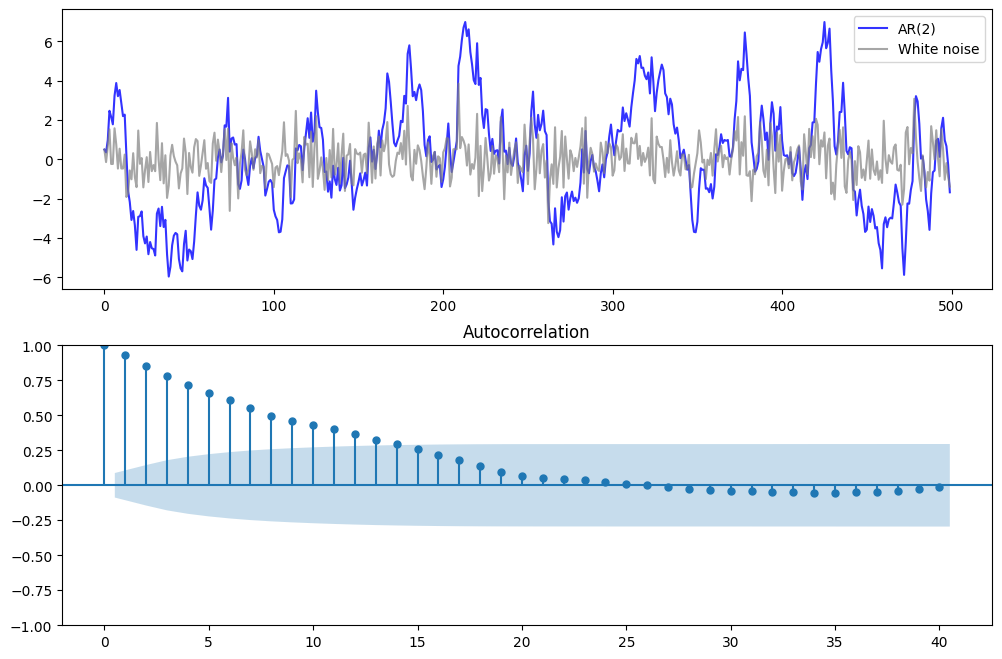

In [7]:
# Set random seed for reproducibility
np.random.seed(42)

# Parameters
N = 500
σ = 1.0  # Standard deviation of white noise
 
# Generate white noise innovations
ε = np.random.normal(0, σ, N)  # Extra samples for initialization

# AR(2) Process: X_t = φ₁*X_{t-1} + φ₂*X_{t-2} + ε_t
ϕ1, ϕ2 = 0.99, -0.05  # AR coefficients

# Initialize AR(2) process
AR2 = np.zeros(N)
AR2[0] = ε[0]
AR2[1] = ϕ1*AR2[0] + ε[1]

# Generate AR(2) series
for t in range(2, N):
    AR2[t] = ϕ1*AR2[t-1] + ϕ2*AR2[t-2] + ε[t]
 
# AR(2) Process
fig, ax = plt.subplots(2,1, figsize = (12, 8))
ax[0].plot(AR2, alpha=0.8, color='blue', label='AR(2)')
ax[0].plot(ε[:N], alpha=0.7, color='gray', label='White noise')
ax[0].legend()

# ACF Plot
plot_acf(AR2, ax=ax[1], lags=40)
plt.show()

🔍Use an MA10 model with $ \theta $ as given below to generate a time-series dataset with 500 samples and the same innovation term as used for the AR(2) model. Plot the time series and the autocorrelation function (ACF).

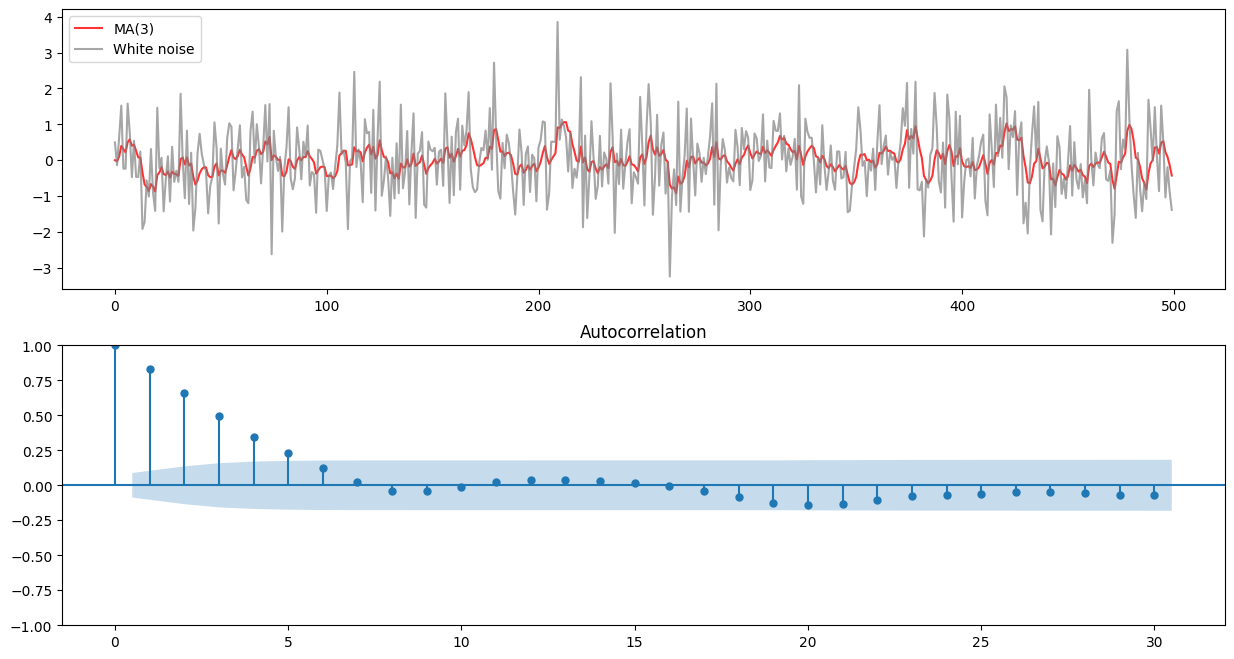

In [8]:
# MA(10) Process: Y_t = ε_t + θ₁*ε_{t-1} + θ₂*ε_{t-2} + θ₃*ε_{t-3}
θ = np.linspace(1,0,10)
θ = θ / θ.sum()

# Generate MA(10) series
MA10 = np.zeros(N)
for t in range(N):
    if t < θ.size:
        MA10[t] = np.sum(θ[:t] * ε[t:0:-1])
    else:
        MA10[t] = np.sum(θ * ε[t:(t-θ.size):-1]) 

# MA10 Process
fig, ax = plt.subplots(2, 1, figsize=(15, 8))
ax[0].plot(MA10, alpha=0.8, color='red', label='MA(3)')
ax[0].plot(ε[:N], alpha=0.7, color='gray', label='White noise')
ax[0].legend()

plot_acf(MA10, ax = ax[1], lags = 30)
plt.show()


⭐ The AR(2) process can be represented as an MA process with infinitely many terms. In other words, the AR(2) process

$ x_t = ϕ_1 x_{t-1} + ϕ_2 x_{t-2} + ε_t $   

is equivalently represented by

$ x_t = ψ_0 ε_t + ψ_1 ε_{t-1} + ψ_2 ε_{t-2} ... $

The MA coefficients $ ψ_j $ are related to the AR coefficients $ ϕ_1, ϕ_2 $ by:

$ \psi_0 = 1 $

$ \psi_1 = \phi_1 $

$ \psi_2 = \phi_1 \psi_1 $

$ \psi_j = \phi_1 \psi_{j-1} + \phi_2 \psi_{j-2} $ for all $ j >= 3 $

* Calculate the first 50 MA coefficients that will result in a time series equivalent to the AR(2) process above. 
* Plot the MA coefficients. 
* Compare the time series generated using the MA process to that generated using the AR(2) process to verify they are the same. 

*Hint: Set the first 50 terms of the MA process equal to the first 50 terms of the AR(2) process. Also make sure to use the exact same innovations $ ε_t $ when generating the two time series*

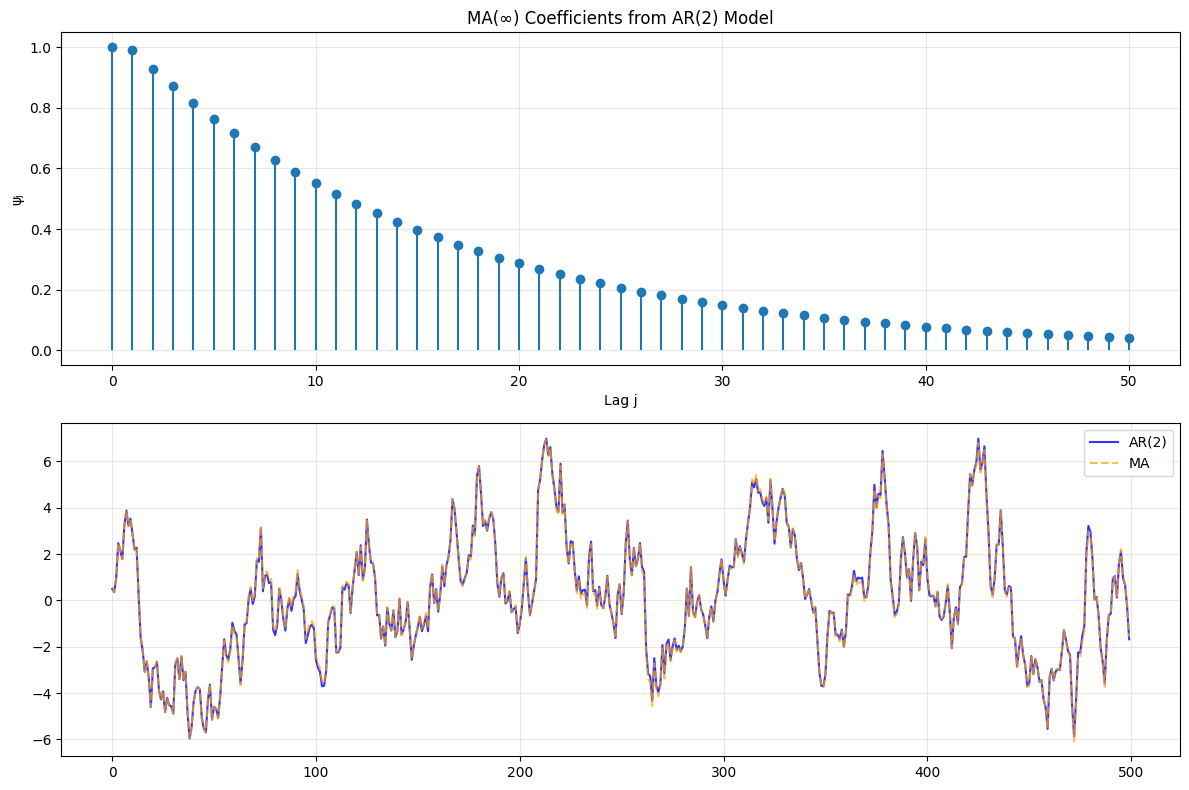

In [9]:
max_lags = 50
ψ = np.zeros(max_lags + 1)
ψ[0] = 1.0
ψ[1] = ϕ1
ψ[2] = ϕ1*ψ[1]     
# Calculate MA coefficients recursively
for j in range(1, max_lags + 1):
    ψ[j] = ϕ1 * ψ[j-1] + ϕ2 * ψ[j-2]


# Generate MA series
MA = np.zeros(N)
for t in range(N):
    if t < ψ.size:
        MA[t] = AR2[t]
    else:
        MA[t] = ε[t]  # Start with innovation
        for j in range(1, ψ.size):
            MA[t] += ψ[j] * ε[t-j]

# Plot the MA coefficients
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

# Plot MA coefficients
axes[0].stem(ψ, basefmt=' ')
axes[0].set_title('MA(∞) Coefficients from AR(2) Model')
axes[0].set_xlabel('Lag j')
axes[0].set_ylabel('ψⱼ')
axes[0].grid(True, alpha=0.3)

# AR(2) Process
axes[1].plot(AR2, alpha=0.8, color='blue', label='AR(2)')
axes[1].plot(MA,  alpha=0.7, linestyle='--', color='orange', label='MA')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()